# Bài tập lớn: Phân tích biến động giá cổ phiếu
Môn học: Lập trình xử lý dữ liệu với Python.

Sinh viên: Trần Hoàng Nguyên.

# Chọn mã cổ phiếu
- Mã: AMZN
- Tên đầy đủ: Amazon.com, Inc.
- Sàn: Nasdaq (quốc tế)
- Dự liệu phân tích từ khoảng cuối tháng 5/2024 -> 5/2025 

In [357]:
!pip install yfinance
!pip install ta


Tất cả các thư viện cần để xử lí dữ liệu

In [358]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import RSIIndicator
import warnings
warnings.filterwarnings('ignore')


# Thu thập dự liệu giá cổ phiếu

In [359]:
# symbol = "AMZN"
# df = yf.Ticker(symbol).history(period='1y').reset_index()
# # Lưu dữ liệu vào 1 file csv
# df.to_csv("AMZN_data.csv", index=False)

In [360]:

# Lấy dữ liệu từ file CSV
df = pd.read_csv("AMZN_data.csv")
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-05-31 00:00:00-04:00,178.300003,179.210007,173.869995,176.440002,58903900,0.0,0.0
1,2024-06-03 00:00:00-04:00,177.699997,178.699997,175.919998,178.339996,30786600,0.0,0.0
2,2024-06-04 00:00:00-04:00,177.639999,179.820007,176.440002,179.339996,27198400,0.0,0.0
3,2024-06-05 00:00:00-04:00,180.100006,181.500000,178.750000,181.279999,32116400,0.0,0.0
4,2024-06-06 00:00:00-04:00,181.750000,185.000000,181.490005,185.000000,31371200,0.0,0.0


In [361]:
df.info()
# ⇒ Dữ liệu chúng ta thu thập được sẽ có 250 ngày giao dịch và có 8 cột dữ liệu được kéo về từ Yahoo Finance


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          250 non-null    object 
 1   Open          250 non-null    float64
 2   High          250 non-null    float64
 3   Low           250 non-null    float64
 4   Close         250 non-null    float64
 5   Volume        250 non-null    int64  
 6   Dividends     250 non-null    float64
 7   Stock Splits  250 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


# Làm sạch và tiền xử lí

In [362]:
df # Dữ liệu thô

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-05-31 00:00:00-04:00,178.300003,179.210007,173.869995,176.440002,58903900,0.0,0.0
1,2024-06-03 00:00:00-04:00,177.699997,178.699997,175.919998,178.339996,30786600,0.0,0.0
2,2024-06-04 00:00:00-04:00,177.639999,179.820007,176.440002,179.339996,27198400,0.0,0.0
3,2024-06-05 00:00:00-04:00,180.100006,181.500000,178.750000,181.279999,32116400,0.0,0.0
4,2024-06-06 00:00:00-04:00,181.750000,185.000000,181.490005,185.000000,31371200,0.0,0.0
...,...,...,...,...,...,...,...,...
245,2025-05-23 00:00:00-04:00,198.899994,202.369995,197.850006,200.990005,33393500,0.0,0.0
246,2025-05-27 00:00:00-04:00,203.089996,206.690002,202.190002,206.020004,34892000,0.0,0.0
247,2025-05-28 00:00:00-04:00,205.919998,207.660004,204.410004,204.720001,28549800,0.0,0.0
248,2025-05-29 00:00:00-04:00,208.029999,208.809998,204.229996,205.699997,34650000,0.0,0.0


In [363]:
# Chuyển cột Date về định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [364]:
# Xoá 2 cột Dividends và Stock Splits có toàn bộ dữ klệu bằng 0.0
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [365]:
# Kiểm tra dữ liệu thiếu và loại bỏ hàng thiếu (nếu có)
print(df.isna().sum())
df.dropna(inplace=True)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


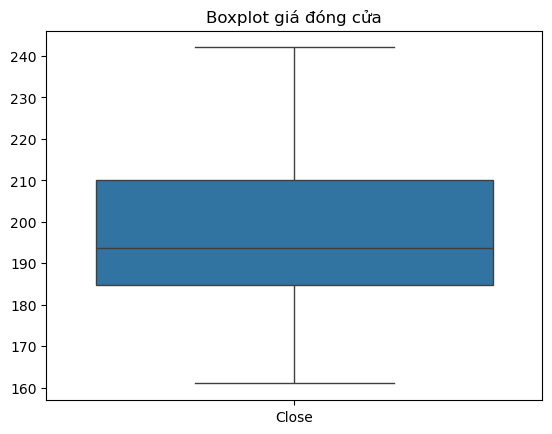

In [366]:
# Kiểm tra outliers bằng boxplot
sns.boxplot(data=df[['Close']])
plt.title("Boxplot giá đóng cửa")
plt.show()

In [367]:
df

,Date,Open,High,Low,Close,Volume
0,2024-05-31 04:00:00+00:00,178.300003,179.210007,173.869995,176.440002,58903900
1,2024-06-03 04:00:00+00:00,177.699997,178.699997,175.919998,178.339996,30786600
2,2024-06-04 04:00:00+00:00,177.639999,179.820007,176.440002,179.339996,27198400
3,2024-06-05 04:00:00+00:00,180.100006,181.500000,178.750000,181.279999,32116400
4,2024-06-06 04:00:00+00:00,181.750000,185.000000,181.490005,185.000000,31371200
...,...,...,...,...,...,...
245,2025-05-23 04:00:00+00:00,198.899994,202.369995,197.850006,200.990005,33393500
246,2025-05-27 04:00:00+00:00,203.089996,206.690002,202.190002,206.020004,34892000
247,2025-05-28 04:00:00+00:00,205.919998,207.660004,204.410004,204.720001,28549800
248,2025-05-29 04:00:00+00:00,208.029999,208.809998,204.229996,205.699997,34650000


# Tính các chỉ số kỹ thuật và phân tích dữ liệu

In [368]:
# SMA
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

In [369]:
# Phân tích chỉ số SMA
# Tạo cột đánh dấu sự khác nhau giữa SMA20 và SMA50
df['Signal'] = 0
df['Signal'][df['SMA20'] > df['SMA50']] = 1
df['Signal'][df['SMA20'] < df['SMA50']] = -1

# Tìm các điểm giao cắt (nơi tín hiệu thay đổi)
df['Crossover'] = df['Signal'].diff()

# Các điểm giao cắt lên (SMA20 cắt lên SMA50)
buy_signals = df[df['Crossover'] == 2]

# Các điểm giao cắt xuống (SMA20 cắt xuống SMA50)
sell_signals = df[df['Crossover'] == -2]

In [370]:
# EMA
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

In [371]:
# RSI
df['RSI'] = RSIIndicator(close=df['Close'], window=14).rsi()

In [372]:
# Lợi suất ngày
df['Daily Return'] = df['Close'].pct_change()

In [373]:
# Volatility theo tháng
df['Month'] = df['Date'].dt.to_period('M')
monthly_vol = df.groupby('Month')['Daily Return'].std()

# Trực quan hoá

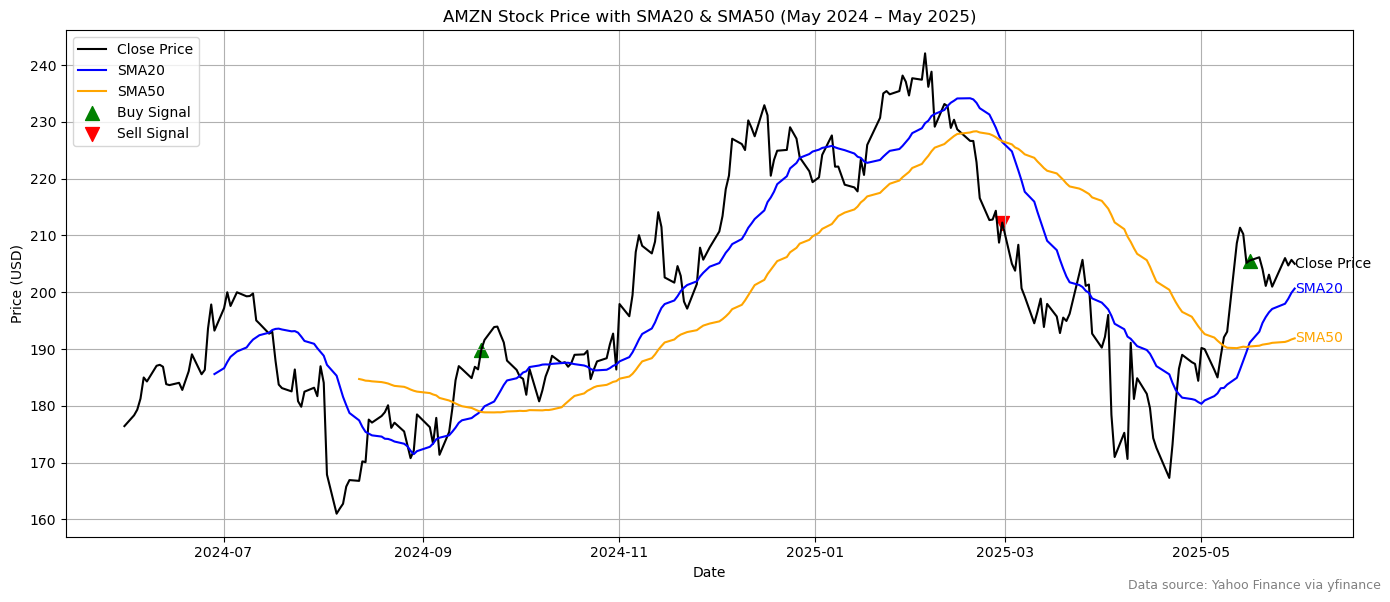

In [374]:
plt.figure(figsize=(14, 6))

# Vẽ đường giá và hai đường trung bình SMA
sns.lineplot(data=df, x='Date', y='Close', color='black', label='Close Price')
sns.lineplot(data=df, x='Date', y='SMA20', color='blue', label='SMA20')
sns.lineplot(data=df, x='Date', y='SMA50', color='orange', label='SMA50')

# Ghi nhãn tên đường ở cuối mỗi đường (góc phải)
plt.text(df['Date'].iloc[-1], df['Close'].iloc[-1], 'Close Price', color='black', fontsize=10, va='center', ha='left')
plt.text(df['Date'].iloc[-1], df['SMA20'].iloc[-1], 'SMA20', color='blue', fontsize=10, va='center', ha='left')
plt.text(df['Date'].iloc[-1], df['SMA50'].iloc[-1], 'SMA50', color='orange', fontsize=10, va='center', ha='left')

# Vẽ tín hiệu mua (Buy) và bán (Sell)
plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='green', s=100, label='Buy Signal')
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='red', s=100, label='Sell Signal')

# Thêm tiêu đề, tên trục và chú thích
plt.title("AMZN Stock Price with SMA20 & SMA50 (May 2024 – May 2025)")
plt.xlabel("Date")  # Trục hoành: ngày
plt.ylabel("Price (USD)")  # Trục tung: giá (USD)
plt.legend(loc='upper left')  # Vị trí chú thích
plt.grid(True)  # Hiện lưới giúp dễ đọc biểu đồ

# Ghi chú nguồn dữ liệu ở góc dưới phải
plt.figtext(0.99, 0.01, 'Data source: Yahoo Finance via yfinance', 
            horizontalalignment='right', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

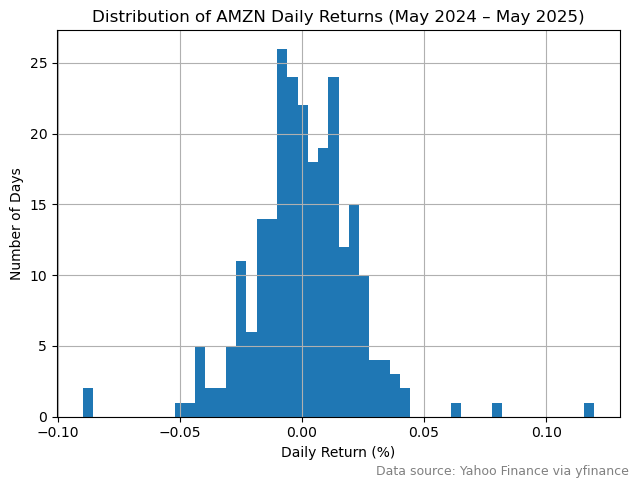

In [375]:
# Histogram lợi suất
df['Daily Return'].hist(bins=50)

plt.title("Distribution of AMZN Daily Returns (May 2024 – May 2025)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Number of Days")

plt.grid(True)
plt.figtext(0.99, 0.00, 'Data source: Yahoo Finance via yfinance',
            horizontalalignment='right', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


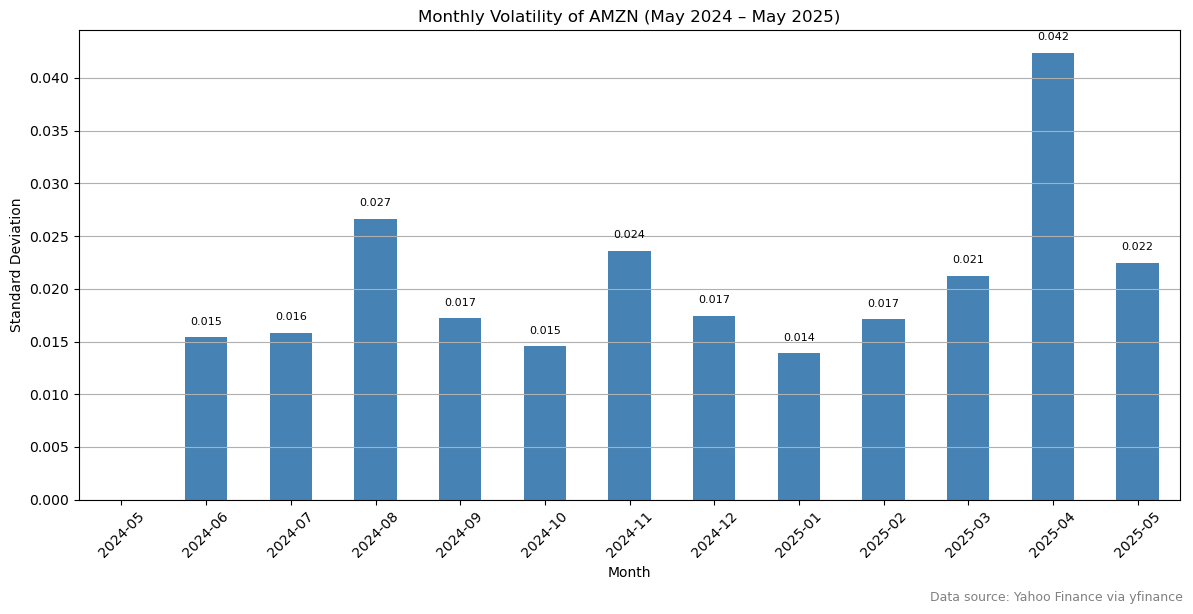

In [376]:
# Volatility theo tháng
fig, ax = plt.subplots(figsize=(12, 6))
monthly_vol.plot(kind='bar', ax=ax, color='steelblue')

# Thiết lập tiêu đề và trục
ax.set_title('Monthly Volatility of AMZN (May 2024 – May 2025)')
ax.set_xlabel('Month')
ax.set_ylabel('Standard Deviation')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y')

# Thêm giá trị lên đầu mỗi cột
for i, value in enumerate(monthly_vol.values):
    ax.text(i, value + 0.001, f'{value:.3f}', ha='center', va='bottom', fontsize=8, color='black')

# Ghi chú nguồn dữ liệu
fig.text(0.99, -0.01, 'Data source: Yahoo Finance via yfinance',
         ha='right', fontsize=9, color='gray')

plt.tight_layout()
plt.show()


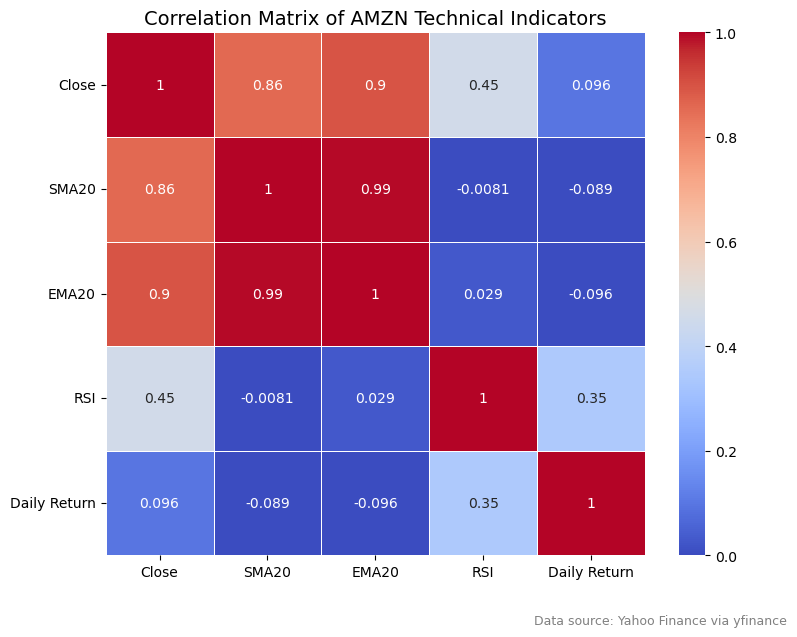

In [377]:
# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5, linecolor='white')

# Tiêu đề và chỉnh hiển thị
plt.title("Correlation Matrix of AMZN Technical Indicators", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Ghi chú nguồn dữ liệu
plt.figtext(0.99, -0.05, 'Data source: Yahoo Finance via yfinance',
            ha='right', fontsize=9, color='gray')

plt.tight_layout()
plt.show()
